In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_excel('./online+retail/Online Retail.xlsx')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

features = df[['InvoiceNo', 'Quantity', 'UnitPrice', 'Country']].copy()

features[['Quantity', 'UnitPrice']] = features[['Quantity', 'UnitPrice']].apply(pd.to_numeric, errors='coerce')
features['InvoiceNo'] = pd.to_numeric(features['InvoiceNo'], errors='coerce')

features.dropna(subset=['InvoiceNo', 'Quantity', 'UnitPrice', 'Country'], inplace=True)
features = features[(features['Quantity'] > 0) & (features['UnitPrice'] > 0)]
features['InvoiceNo'] = features['InvoiceNo'].astype(int)
features['Total'] = features['Quantity'] * features['UnitPrice']
invoice_freq = features['InvoiceNo'].value_counts()
features['Frequency'] = features['InvoiceNo'].map(invoice_freq)

print(features.head())

   InvoiceNo  Quantity  UnitPrice         Country  Total  Frequency
0     536365         6       2.55  United Kingdom  15.30          7
1     536365         6       3.39  United Kingdom  20.34          7
2     536365         8       2.75  United Kingdom  22.00          7
3     536365         6       3.39  United Kingdom  20.34          7
4     536365         6       3.39  United Kingdom  20.34          7


In [2]:
X = features[['Total', 'Frequency','Quantity', 'UnitPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

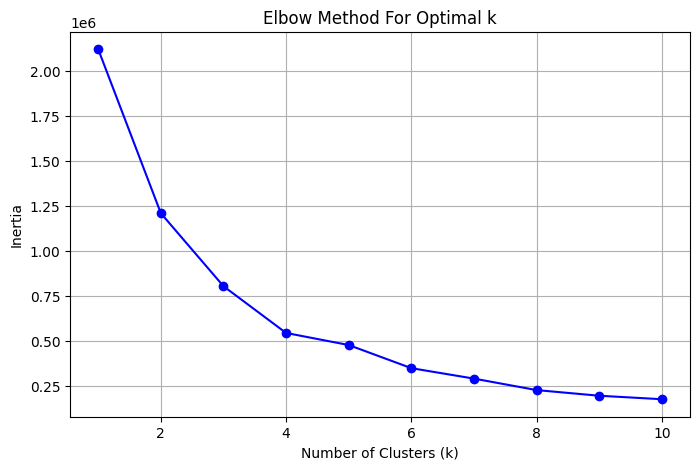

In [3]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [6]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

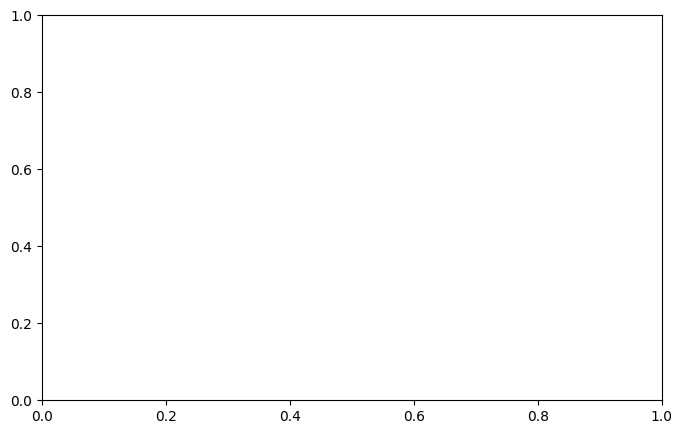

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')
plt.grid(True)
plt.savefig("")
plt.show()

             Total  Frequency  Quantity  UnitPrice
Cluster                                           
0             9.88     489.79      2.85       5.21
1        122826.60       1.00  77605.00       1.56
2            20.71      62.03     11.22       3.51
3          2790.63     161.83      1.00    2790.63


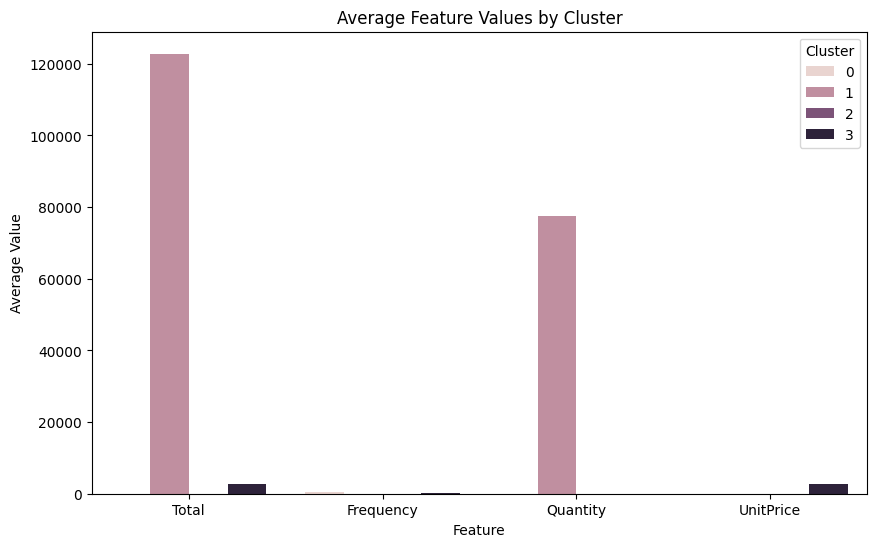

In [4]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
features['Cluster'] =kmeans.labels_

cluster_summary = features.groupby('Cluster')[['Total', 'Frequency','Quantity', 'UnitPrice']].mean().round(2)
print(cluster_summary)

cluster_summary = cluster_summary.reset_index()
melted = pd.melt(cluster_summary, id_vars='Cluster', var_name='Feature', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Feature', y='Average', hue='Cluster')
plt.title('Average Feature Values by Cluster')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.legend(title='Cluster')
plt.show()